In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator - Data Augmentation
from keras.utils import img_to_array, array_to_img, load_img

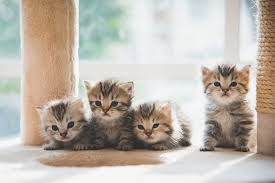

In [ ]:
# Load the image for data augmentation purpose
image_file = '/content/cats.jpeg'
cat_image = keras.preprocessing.image.load_img(image_file)
cat_image

In [ ]:
cat_image_array = keras.preprocessing.image.img_to_array(cat_image)
cat_image_array

array([[[188., 208., 206.],
        [185., 205., 203.],
        [181., 201., 199.],
        ...,
        [ 83.,  61.,  47.],
        [ 79.,  60.,  45.],
        [ 76.,  57.,  42.]],

       [[187., 207., 205.],
        [182., 202., 200.],
        [175., 195., 193.],
        ...,
        [ 90.,  68.,  54.],
        [ 86.,  67.,  52.],
        [ 83.,  64.,  49.]],

       [[185., 205., 203.],
        [179., 199., 197.],
        [171., 191., 189.],
        ...,
        [100.,  78.,  64.],
        [ 96.,  77.,  62.],
        [ 93.,  74.,  59.]],

       ...,

       [[243., 243., 243.],
        [243., 243., 243.],
        [243., 243., 243.],
        ...,
        [143., 148., 154.],
        [141., 146., 150.],
        [137., 142., 146.]],

       [[242., 242., 242.],
        [242., 242., 242.],
        [242., 242., 242.],
        ...,
        [119., 122., 127.],
        [117., 120., 125.],
        [115., 116., 121.]],

       [[242., 242., 242.],
        [242., 242., 242.],
        [242., 2

In [ ]:
# Apply Data Augmentation Method
def plot_image(original_image, updated_image):
  plt.figure(figsize=(16,10))
  # original image
  plt.subplot(1,2,1)
  plt.title('original image')
  plt.imshow(original_image)

  #updated_image
  plt.subplot(1,2,2)
  plt.title("updated image")
  plt.imshow(updated_image)

  plt.show()

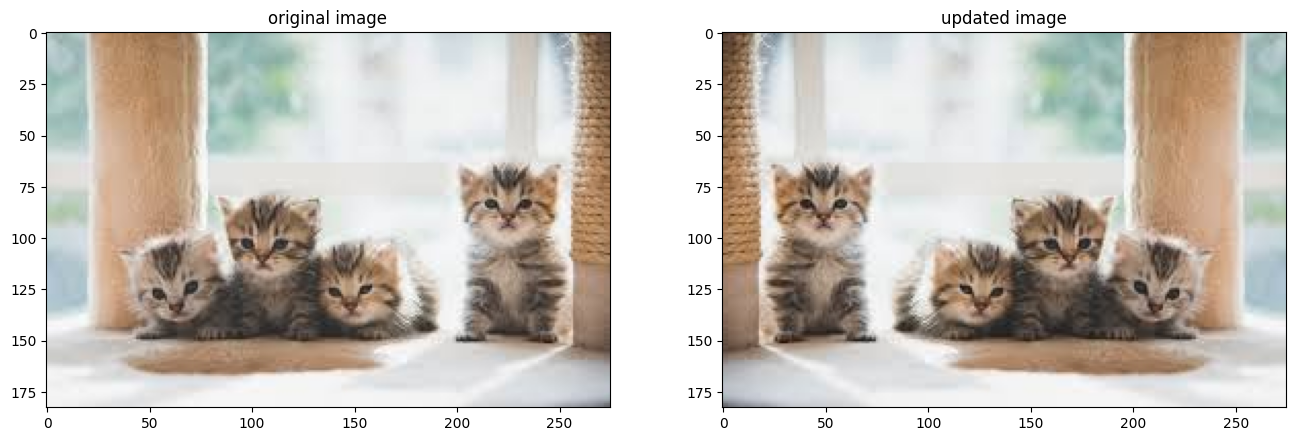

In [ ]:
# Data Augmentation method
# Horizontal flip
updated_data = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
updated_array = updated_data.random_transform(cat_image_array)
updated_image = keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image)
plt.show()

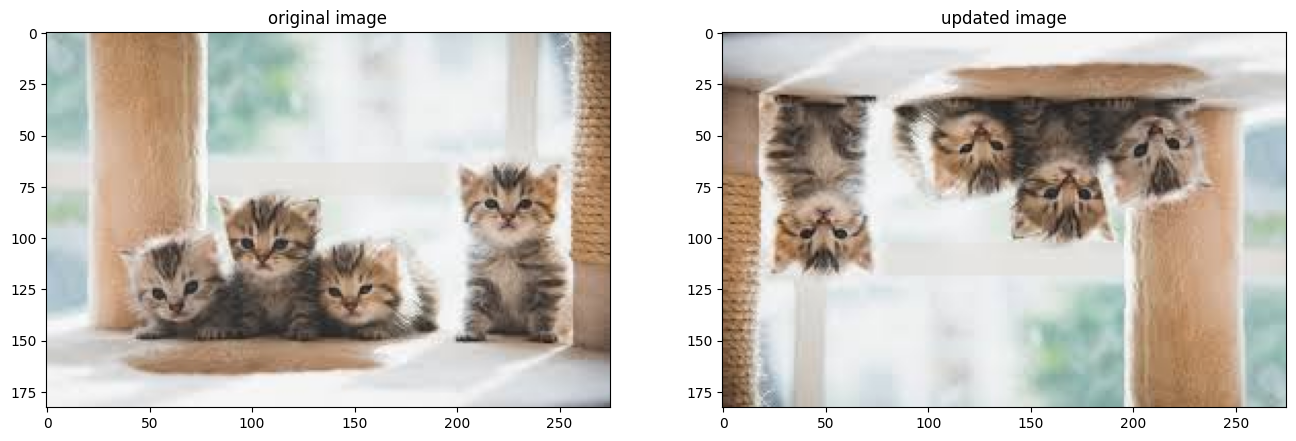

In [ ]:
# Vertical flip
updated_data = keras.preprocessing.image.ImageDataGenerator(vertical_flip=True, horizontal_flip=True)
updated_array = updated_data.random_transform(cat_image_array)
updated_image = keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image)
plt.show()

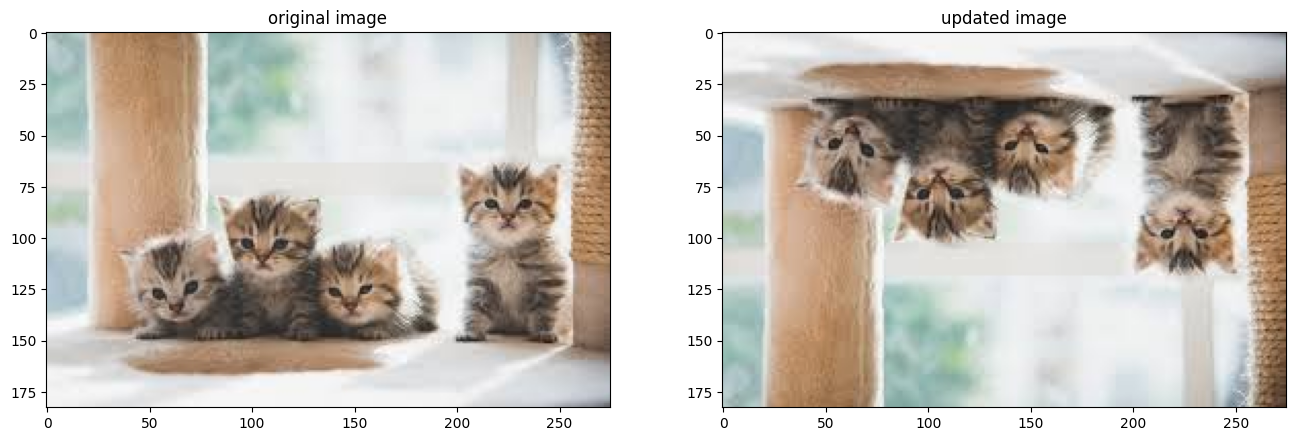

In [ ]:
updated_data = keras.preprocessing.image.ImageDataGenerator(vertical_flip=True)
updated_array = updated_data.random_transform(cat_image_array)
updated_image1 = keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image1)
plt.show()

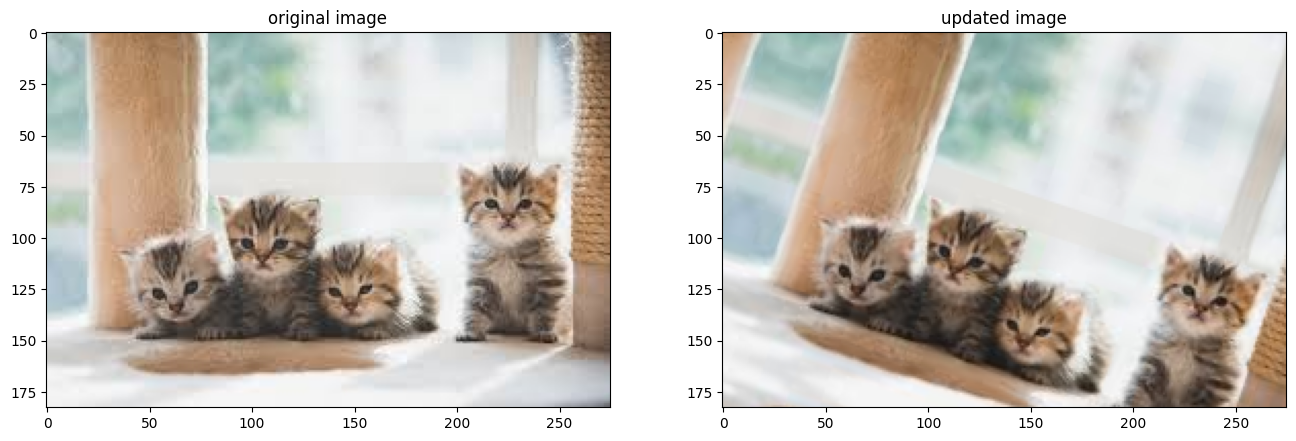

In [ ]:
updated_data = keras.preprocessing.image.ImageDataGenerator(rotation_range=30, fill_mode='reflect')
updated_array = updated_data.random_transform(cat_image_array)
updated_image1 = keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image1)
plt.show()

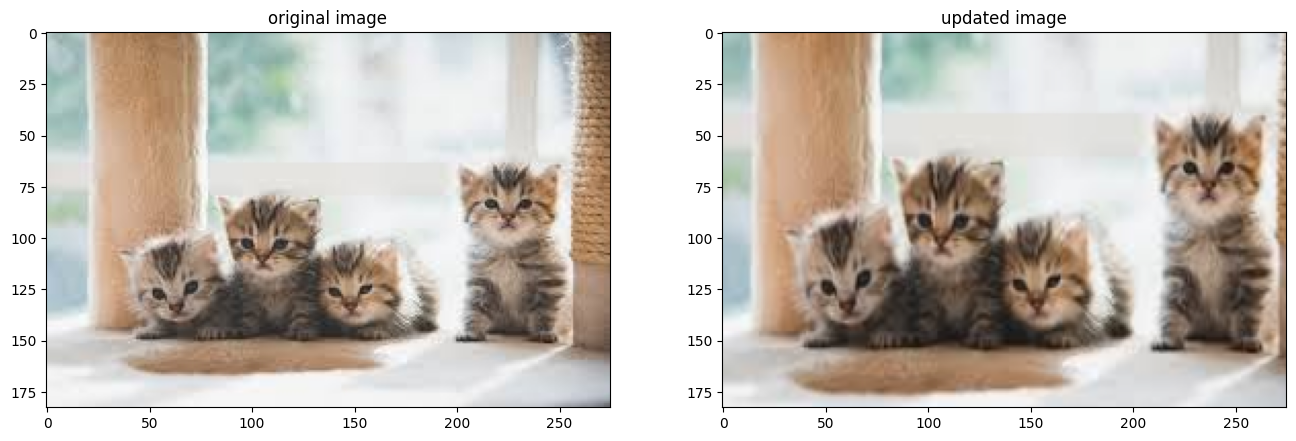

In [ ]:
updated_data = keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.4,1.6], fill_mode='reflect')
updated_array = updated_data.random_transform(cat_image_array)
updated_image1 = keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image1)
plt.show()

In [ ]:
# Parameter in Data Augmentation
dataset = keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,
                                                       samplewise_center=True,
                                                       featurewise_std_normalization=True,
                                                       samplewise_std_normalization=True,
                                                       zca_whitening=True,
                                                       zca_epsilon=1e-06, rotation_range=15,
                                                       width_shift_range=0.2,
                                                       height_shift_range=0.3,
                                                       brightness_range=None,
                                                       shear_range=0.2,
                                                       zoom_range=0.3,
                                                       channel_shift_range=0.1,
                                                       fill_mode='nearest',
                                                       cval=0.1, horizontal_flip=True,
                                                       vertical_flip=True,
                                                       rescale=None, preprocessing_function=None,
                                                       data_format=None, validation_split=0.0,
                                                       interpolation_order=1)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


In [ ]:
cat_image_array.shape

(183, 275, 3)

In [ ]:
cat_image_array_reshape = cat_image_array.reshape((1,) + cat_image_array.shape)
cat_image_array_reshape.shape

(1, 183, 275, 3)

In [ ]:
directory = '/content/sample_data'
i = 0
for j in dataset.flow(cat_image_array_reshape, save_to_dir=directory, save_prefix='cat_image',
                      save_format='jpeg'):
  i +=1
  if i >100:
    break

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1885: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


# Padding concept

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D
from keras import Sequential

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
input_shape = (28,28,1)

In [ ]:
model = Sequential()
# padding='valid' means no padding used and formula is (output = (n-k+1))
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 128)               1982592   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2002698 (7.64 MB)
Trainable params: 2002

In [ ]:
22*22*32

15488

In [ ]:
15488*128+128

1982592

In [ ]:
from keras.layers import BatchNormalization
model = Sequential()
# padding='same' means adding one padding used and formula is (output = (n-k+2p+1))
# strides=1 is by default in keras code
model.add(Conv2D(32, kernel_size=(3,3), padding='same',strides=1, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), padding='same',strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), padding='same',strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 28, 28, 32)       

In [ ]:
otal params: 3232394 (12.33 MB)
Trainable params: 3231946 (12.33 MB)
Non-trainable params: 448 (1.75 KB)
_____________________________________

In [ ]:
from keras.layers import BatchNormalization
model = Sequential()
# padding='same' means adding one padding used and formula is (output = (n-k+2p+1))
# strides=1 is by default in keras code
model.add(Conv2D(32, kernel_size=(3,3), padding='same',strides=3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), padding='same',strides=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), padding='same',strides=3, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 10, 10, 32)        320       
                                                                 
 batch_normalization_12 (Ba  (None, 10, 10, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_19 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 batch_normalization_13 (Ba  (None, 4, 4, 32)          128       
 tchNormalization)                                               
                                                                 
 conv2d_20 (Conv2D)          (None, 2, 2, 32)          9248      
                                                                 
 batch_normalization_14 (Ba  (None, 2, 2, 32)         

In [ ]:
from keras.layers import BatchNormalization
model = Sequential()
# padding='same' means adding one padding used and formula is (output = (n-k+2p+1))
# strides=1 is by default in keras code
model.add(Conv2D(32, kernel_size=(3,3), strides=3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), strides=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), strides=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), strides=3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.summary()

ValueError: Exception encountered when calling layer "conv2d_24" (type Conv2D).

Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_24/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 3, 3, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_24/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,32].

Call arguments received by layer "conv2d_24" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 32), dtype=float32)

# MaxPooling Layer

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from keras.layers import *
from keras import Sequential

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
x_train = x_train/255.0
x_test = x_test/255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [13]:
from keras.layers import BatchNormalization
model = Sequential()
# padding='same' means adding one padding used and formula is (output = (n-k+2p+1))
# strides=1 is by default in keras code
model.add(Conv2D(32, kernel_size=(3,3), padding='same',strides=1, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2)) # type = MaxPooling, Strides=2 , size=(2,2)
model.add(Conv2D(32, kernel_size=(3,3), padding='same',strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(32, kernel_size=(3,3), padding='same',strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
# Paramater calculated Formula :
# (kernel_weight * kernel_height * No_of_cheneel(either 1 or 3) * no_of_filter) + no_of_filter

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 3, 3, 32)         

In [14]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 10s 6ms/step - loss: 0.2101 - accuracy: 0.9343 - val_loss: 0.0609 - val_accuracy: 0.9803
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0536 - accuracy: 0.9828 - val_loss: 0.0505 - val_accuracy: 0.9849
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0388 - accuracy: 0.9876 - val_loss: 0.0283 - val_accuracy: 0.9899
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0281 - val_accuracy: 0.9911
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0283 - val_accuracy: 0.9895
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0214 - accuracy: 0.9932 - val_loss: 0.0283 - val_accuracy: 0.9909
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0251 - val_accuracy: 0.9909
Epoch